# Non-Clifford CNOT-Dihedral Interleaved Randomized Benchmarking 
# of a CS gate

In [1]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

#Import Qiskit classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel, errors
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error
from qiskit.quantum_info.operators import Operator

#Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

#from examples import CS_utils

In [2]:
#Number of qubits
nQ = 2
#There are 3 qubits: Q0,Q1.
#Number of seeds (random sequences)
nseeds = 10
#Number of Cliffords in the sequence (start, stop, steps)
nCliffs = [1,5,10,20,30,50,75,100,125,150] # [1,10,25,50,100,150] #
#2Q RB on Q0,Q2 and 1Q RB on Q1
rb_pattern = [[0,1]]
# Non-Clifford RB
group_gates = 'CNOT-Dihedral'
# number of shots
nshots = 1024

### Interleaved RB with a CS gate 

Defining a CS gate using an operator.

In [3]:
rb_opts = {}
rb_opts['length_vector'] = nCliffs
rb_opts['nseeds'] = nseeds
rb_opts['rb_pattern'] = rb_pattern
rb_opts['group_gates'] = group_gates
rb_opts['align_cliffs'] = True

CS01 = rb.dihedral.CNOTDihedral(2)
CS01.phase(1, 0)
CS01.phase(1, 1)
CS01.cnot(0, 1)
CS01.phase(7, 1)
CS01.cnot(0, 1)

cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

rb_opts['interleaved_gates'] = [(CS01, [('cs', 0, 1)])]

rb_cnotdihedral_Z_circs, xdata, rb_cnotdihedral_X_circs, rb_cnotdihedral_interleaved_Z_circs, \
rb_cnotdihedral_interleaved_X_circs = rb.randomized_benchmarking_seq(**rb_opts)

In [4]:
print (rb_cnotdihedral_Z_circs[0][0])

      ┌────────┐┌───┐                 ┌───┐┌──────────┐ ░  ░ ┌────────────┐»
qr_0: ┤ U1(pi) ├┤ X ├──■──────────────┤ X ├┤ U1(pi/4) ├─░──░─┤ U1(5.4978) ├»
      └─┬───┬──┘└───┘┌─┴─┐┌──────────┐└─┬─┘└──────────┘ ░  ░ └────────────┘»
qr_1: ──┤ X ├────────┤ X ├┤ U1(pi/4) ├──■───────────────░──░───────────────»
        └───┘        └───┘└──────────┘                  ░  ░               »
cr: 2/═════════════════════════════════════════════════════════════════════»
                                                                           »
«      ┌───┐                   ┌───┐┌────────┐┌─┐
«qr_0: ┤ X ├────────────────■──┤ X ├┤ U1(pi) ├┤M├
«      └─┬─┘┌────────────┐┌─┴─┐├───┤└──┬─┬───┘└╥┘
«qr_1: ──■──┤ U1(5.4978) ├┤ X ├┤ X ├───┤M├─────╫─
«           └────────────┘└───┘└───┘   └╥┘     ║ 
«cr: 2/═════════════════════════════════╩══════╩═
«                                       1      0 


In [5]:
print (rb_cnotdihedral_interleaved_Z_circs[0][0])

      ┌────────┐┌───┐                 ┌───┐┌──────────┐ ░ ┌─────┐ ░  ░ »
qr_0: ┤ U1(pi) ├┤ X ├──■──────────────┤ X ├┤ U1(pi/4) ├─░─┤0    ├─░──░─»
      └─┬───┬──┘└───┘┌─┴─┐┌──────────┐└─┬─┘└──────────┘ ░ │  cs │ ░  ░ »
qr_1: ──┤ X ├────────┤ X ├┤ U1(pi/4) ├──■───────────────░─┤1    ├─░──░─»
        └───┘        └───┘└──────────┘                  ░ └─────┘ ░  ░ »
cr: 2/═════════════════════════════════════════════════════════════════»
                                                                       »
«      ┌────────────┐┌───┐                   ┌───┐┌────────────┐┌─┐
«qr_0: ┤ U1(4.7124) ├┤ X ├────────────────■──┤ X ├┤ U1(2.3562) ├┤M├
«      └────────────┘└─┬─┘┌────────────┐┌─┴─┐├───┤└────┬─┬─────┘└╥┘
«qr_1: ────────────────■──┤ U1(4.7124) ├┤ X ├┤ X ├─────┤M├───────╫─
«                         └────────────┘└───┘└───┘     └╥┘       ║ 
«cr: 2/═════════════════════════════════════════════════╩════════╩═
«                                                       1        0 


In [6]:
print (rb_cnotdihedral_X_circs[0][0])

      ┌───┐ ░ ┌────────┐┌───┐                 ┌───┐┌──────────┐ ░  ░ »
qr_0: ┤ H ├─░─┤ U1(pi) ├┤ X ├──■──────────────┤ X ├┤ U1(pi/4) ├─░──░─»
      ├───┤ ░ └─┬───┬──┘└───┘┌─┴─┐┌──────────┐└─┬─┘└──────────┘ ░  ░ »
qr_1: ┤ H ├─░───┤ X ├────────┤ X ├┤ U1(pi/4) ├──■───────────────░──░─»
      └───┘ ░   └───┘        └───┘└──────────┘                  ░  ░ »
cr: 2/═══════════════════════════════════════════════════════════════»
                                                                     »
«      ┌────────────┐┌───┐                   ┌───┐┌────────┐  ░  ┌───┐┌─┐
«qr_0: ┤ U1(5.4978) ├┤ X ├────────────────■──┤ X ├┤ U1(pi) ├──░──┤ H ├┤M├
«      └────────────┘└─┬─┘┌────────────┐┌─┴─┐├───┤└───░────┘┌───┐└┬─┬┘└╥┘
«qr_1: ────────────────■──┤ U1(5.4978) ├┤ X ├┤ X ├────░─────┤ H ├─┤M├──╫─
«                         └────────────┘└───┘└───┘    ░     └───┘ └╥┘  ║ 
«cr: 2/════════════════════════════════════════════════════════════╩═══╩═
«                                                          

In [7]:
print (rb_cnotdihedral_interleaved_X_circs[0][0])

      ┌───┐ ░ ┌────────┐┌───┐                 ┌───┐┌──────────┐ ░ ┌─────┐ ░  ░ »
qr_0: ┤ H ├─░─┤ U1(pi) ├┤ X ├──■──────────────┤ X ├┤ U1(pi/4) ├─░─┤0    ├─░──░─»
      ├───┤ ░ └─┬───┬──┘└───┘┌─┴─┐┌──────────┐└─┬─┘└──────────┘ ░ │  cs │ ░  ░ »
qr_1: ┤ H ├─░───┤ X ├────────┤ X ├┤ U1(pi/4) ├──■───────────────░─┤1    ├─░──░─»
      └───┘ ░   └───┘        └───┘└──────────┘                  ░ └─────┘ ░  ░ »
cr: 2/═════════════════════════════════════════════════════════════════════════»
                                                                               »
«      ┌────────────┐┌───┐                   ┌───┐┌────────────┐  ░  ┌───┐┌─┐
«qr_0: ┤ U1(4.7124) ├┤ X ├────────────────■──┤ X ├┤ U1(2.3562) ├──░──┤ H ├┤M├
«      └────────────┘└─┬─┘┌────────────┐┌─┴─┐├───┤└─────░──────┘┌───┐└┬─┬┘└╥┘
«qr_1: ────────────────■──┤ U1(4.7124) ├┤ X ├┤ X ├──────░───────┤ H ├─┤M├──╫─
«                         └────────────┘└───┘└───┘      ░       └───┘ └╥┘  ║ 
«cr: 2/════════════════════════════════════

### Add a depolarize noise to the CS gate

In [8]:
cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

### Add depolarizing error to "cs" gate

p1Qu2 = 0.00055
p1Qu3 = 0.001
p2Qcx = 0.0146/0.75
p2Qcs = 0.0146/0.75

# Construct the error
cs_error = errors.depolarizing_error(p2Qcs, 2)
print ("Depolarizing errors on u2,u3,cs,cx gates respectively:", p1Qu2, p1Qu3, p2Qcs, p2Qcx)

# Build the noise model by adding the error to the "cs" gate
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Qu2, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Qu3, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Qcx, 2), 'cx')
noise_model.add_all_qubit_quantum_error(cs_error, 'cs')
print (noise_model)

noise_model.add_basis_gates(['unitary'])
basis_gates = noise_model.basis_gates
print("basis_gates:", basis_gates)

Depolarizing errors on u2,u3,cs,cx gates respectively: 0.00055 0.001 0.019466666666666667 0.019466666666666667
NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u2', 'cx', 'cs', 'u3']
  All-qubits errors: ['u2', 'u3', 'cx', 'cs']
basis_gates: ['cx', 'id', 'u2', 'u3', 'unitary']


### Execute the RB sequences

In [9]:
#CNOT-Dihedral RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = nshots
cnotdihedral_X_result_list = []
cnotdihedral_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_X_result_list.append(job.result())
    cnotdihedral_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral X Circuits


In [10]:
#CNOT-Dihedral interleaved RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = nshots
cnotdihedral_interleaved_X_result_list = []
cnotdihedral_interleaved_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_X_result_list.append(job.result())
    cnotdihedral_interleaved_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral Interleaved X Circuits


In [11]:
#CNOT-Dihedral RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = nshots
cnotdihedral_Z_result_list = []
cnotdihedral_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_Z_result_list.append(job.result())
    cnotdihedral_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral Z Circuits


In [12]:
#CNOT-Dihedral inteleaved RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = nshots
cnotdihedral_interleaved_Z_result_list = []
cnotdihedral_interleaved_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_Z_result_list.append(job.result())
    cnotdihedral_interleaved_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral Interleaved Z Circuits


### Fit the results

In [13]:
#Create the cnot-dihedral Z and X RB fitters
cnotdihedral_Z_rb_fit = rb.RBFitter(cnotdihedral_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_X_rb_fit = rb.RBFitter(cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])

In [14]:
# Print the Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of Z circuits:', cnotdihedral_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of Z circuits: {'params': array([0.73137103, 0.96429388, 0.24678113]), 'params_err': array([0.00479928, 0.00073578, 0.00260576]), 'epc': 0.026779591001048042, 'epc_err': 0.0005722668279312232}


In [15]:
# Print the X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of X circuits:', cnotdihedral_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of X circuits: {'params': array([0.72226214, 0.96423952, 0.25053737]), 'params_err': array([0.00269836, 0.00037391, 0.00118351]), 'epc': 0.026820360743249533, 'epc_err': 0.00029083112918570003}


In [16]:
#Create the cnot-dihedral intelreaved Z and X RB fitters
cnotdihedral_interleaved_Z_rb_fit = rb.RBFitter(cnotdihedral_interleaved_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_interleaved_X_rb_fit = rb.RBFitter(cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

In [17]:
# Print the interleaved Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved Z circuits:', cnotdihedral_interleaved_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved Z circuits: {'params': array([0.72293288, 0.94708637, 0.24907442]), 'params_err': array([0.00466625, 0.00084603, 0.0016529 ]), 'epc': 0.03968521977655182, 'epc_err': 0.000669971833355738}


In [18]:
# Print the interleaved X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved X circuits:', cnotdihedral_interleaved_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved X circuits: {'params': array([0.72753703, 0.94460299, 0.25128739]), 'params_err': array([0.00366595, 0.00065577, 0.00174561]), 'epc': 0.04154775757921553, 'epc_err': 0.0005206696124797914}


In [19]:
#Calculate the joint fitter
joint_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_Z_result_list, cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])
joint_int_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_interleaved_Z_result_list, cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

### Calculate the fidelity

In [20]:
#Print the joint fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB:', joint_rb_fit.fit_cnotdihedral[patt_ind])
#Print the joint interleaved parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral interleaved RB:', joint_int_rb_fit.fit_cnotdihedral[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB: {'alpha': 0.9642503909402544, 'alpha_err': 0.0003457231522969746, 'epg_est': 0.026812206794809168, 'epg_est_err': 0.0002689056355682586}
pattern: 0 - 2 qubit cnot-dihedral interleaved RB: {'alpha': 0.9450996666417563, 'alpha_err': 0.0005834098560549539, 'epg_est': 0.0411752500186828, 'epg_est_err': 0.0004629748665513743}


In [21]:
#Expected error of the interleaved cs gate
alpha = joint_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_c = joint_int_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']
alpha_c_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']

nrb = 2 ** nQ
r_est = (nrb - 1) * (1 - alpha_c / alpha) / nrb

alpha_err_sq = (alpha_err / alpha) * (alpha_err / alpha)
alpha_c_err_sq = (alpha_c_err / alpha_c) * (alpha_c_err / alpha_c)
r_est_err = ((nrb - 1) / nrb) * (alpha_c / alpha) * (np.sqrt(alpha_err_sq + alpha_c_err_sq))

print ("Estimated gate error: %f (%f)" %(r_est, r_est_err))
print('RB fidelity = %.5f' % (1 - r_est))

Estimated gate error: 0.014896 (0.000377)
RB fidelity = 0.98510


### Plot the results

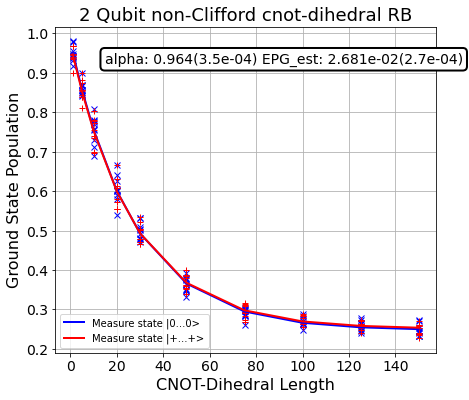

In [22]:
#Plot the joint RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()

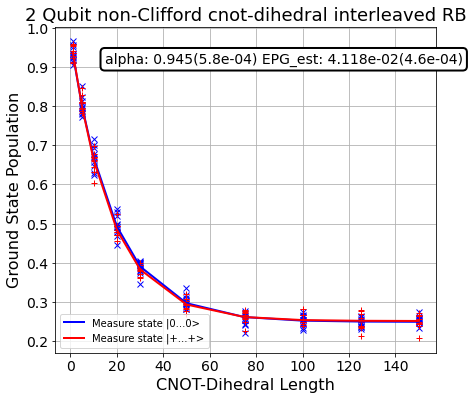

In [23]:
#Plot the joint interleaved RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_int_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral interleaved RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()

In [24]:
import pickle
rb_circs_tuple = rb_cnotdihedral_Z_circs, rb_cnotdihedral_X_circs, rb_cnotdihedral_interleaved_Z_circs, \
rb_cnotdihedral_interleaved_X_circs
#with open('cs_rb_circs_n10_length10_sim5.pk', 'wb') as fp:
#    pickle.dump(rb_circs_tuple, fp) 